# Datenvisualisierung in Python

## Laden der erforderlichen Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter

## Import des Datensatzes

Die folgenden Übungen basieren auf den Ausgaben des Bundes für den
Zeitraum von 1990 bis 2027.

In [2]:
df_bundesfinanzen = pd.read_csv('./data/240627_bundesausgaben_timeline.csv')
print(df_bundesfinanzen.head())

   Jahr  Bildung und Forschung  Finanzen und Steuern    Sicherheit  \
0  1990           2.915631e+09          4.284407e+09  6.232319e+09   
1  1991           3.196256e+09          4.556436e+09  6.403684e+09   
2  1992           3.463842e+09          5.520356e+09  6.469725e+09   
3  1993           3.588631e+09          5.211826e+09  5.989260e+09   
4  1994           3.708234e+09          6.271460e+09  6.180145e+09   

   Soziale Wohlfahrt       Verkehr  
0       6.875148e+09  4.626737e+09  
1       8.091567e+09  5.372566e+09  
2       8.615627e+09  5.541553e+09  
3       1.129834e+10  6.127085e+09  
4       1.069757e+10  6.044093e+09  


## Teile eines Ganzen

* Kuchen
* Tree Map
* Horizontale (sortierte) Balken


### Pie Chart

#### Extraktion der erforderlichen Daten

In [3]:
y2023 = df_bundesfinanzen.loc[df_bundesfinanzen['Jahr'] == 2023]
print(y2023)
y2023 = y2023.loc[33].tolist()
print(f'Rohliste: {y2023}')
y2023 = y2023[1:]
print(f'bereinigte Liste: {y2023}')


    Jahr  Bildung und Forschung  Finanzen und Steuern    Sicherheit  \
33  2023           8.213808e+09          1.220824e+10  6.958976e+09   

    Soziale Wohlfahrt       Verkehr  
33       2.716651e+10  1.061395e+10  
Rohliste: [2023.0, 8213807883.0, 12208236019.0, 6958976234.0, 27166508510.0, 10613951369.0]
bereinigte Liste: [8213807883.0, 12208236019.0, 6958976234.0, 27166508510.0, 10613951369.0]


#### Darstellung der Daten

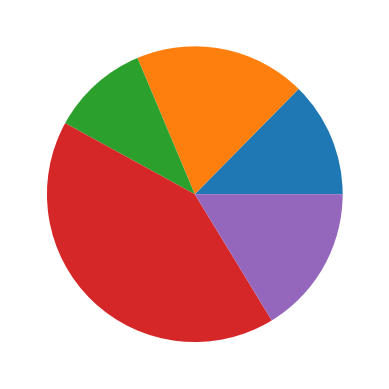

In [4]:
plt.pie(y2023)
plt.show()

In [5]:
# Aufbereitung der Beschriftung
labels = df_bundesfinanzen.columns.tolist()
print(f'Unbereinigte Labels: {labels}')
labels = labels[1:]
print(f'bereinigte Labels: {labels}')

Unbereinigte Labels: ['Jahr', 'Bildung und Forschung', 'Finanzen und Steuern', 'Sicherheit', 'Soziale Wohlfahrt', 'Verkehr']
bereinigte Labels: ['Bildung und Forschung', 'Finanzen und Steuern', 'Sicherheit', 'Soziale Wohlfahrt', 'Verkehr']


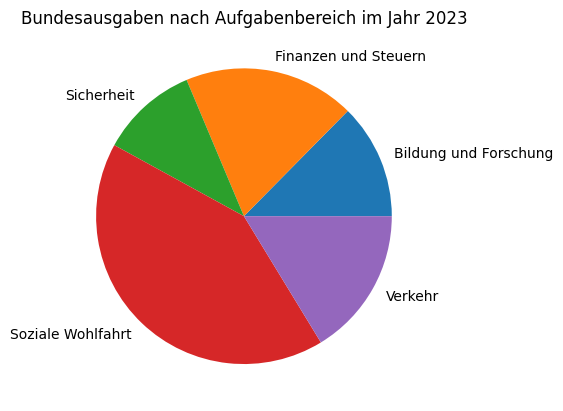

In [6]:
plt.pie(y2023, labels=labels)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

#### Farben

[Color Names](https://xkcd.com/color/rgb/)

In [7]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [27]:
#colors = ['purple', 'green', 'blue', 'pink', 'red']
colors = plt.cm.Pastel1.colors

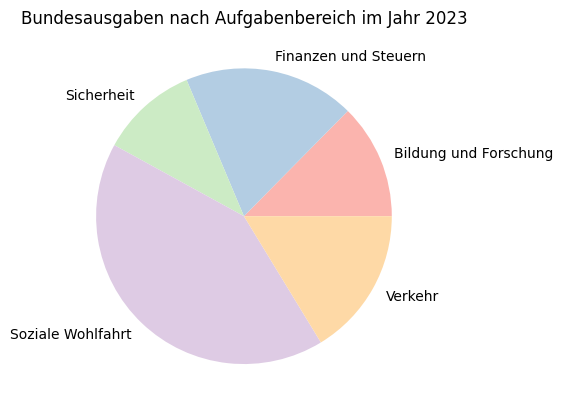

In [23]:
plt.pie(y2023, labels=labels, colors=colors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

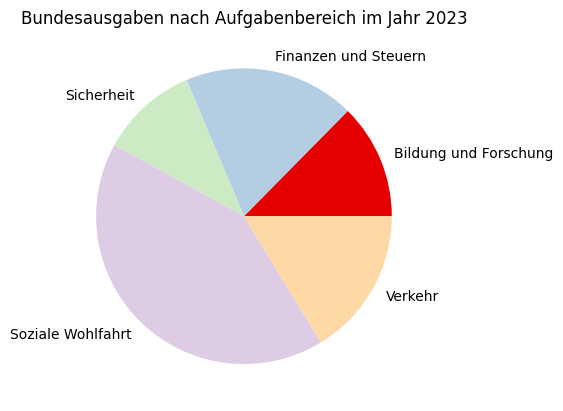

In [28]:
colors = list(colors)
colors[0] = '#e50000'
plt.pie(y2023, labels=labels, colors=colors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

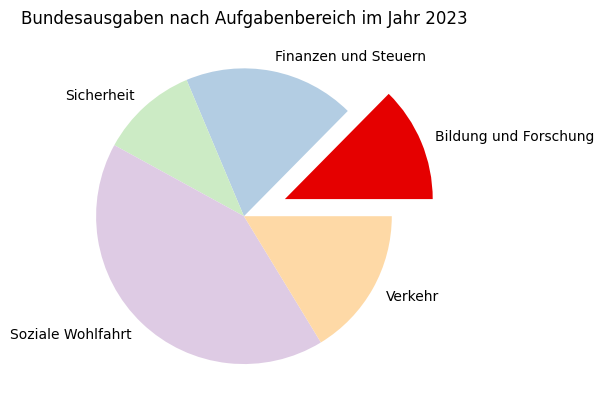

In [30]:
colors = list(colors)
colors[0] = '#e50000'

offset = [0.3, 0, 0, 0, 0]

plt.pie(y2023, labels=labels, colors=colors, explode=offset)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

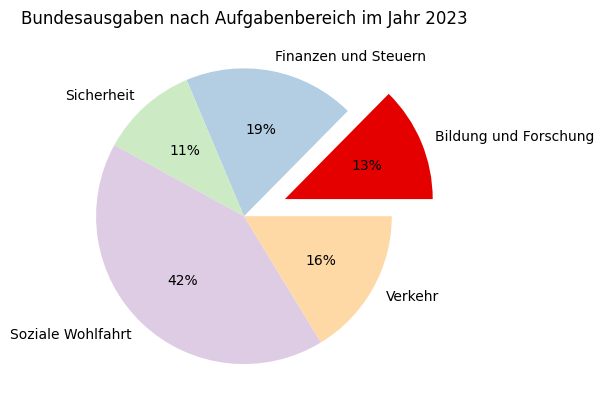

In [35]:
colors = list(colors)
colors[0] = '#e50000'

offset = [0.3, 0, 0, 0, 0]

plt.pie(y2023, labels=labels, colors=colors, explode=offset, autopct='%1.0f%%')
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

### Tree Map

In [ ]:
squarify.plot(sizes=y2023, label=labels, color=colors, alpha=0.5)
plt.axis('off')
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.show()

#### Bar Chart

In [ ]:
df = pd.DataFrame({
    'spendings':y2023,
    'labels': labels})

In [ ]:
plt.barh(y=df.labels, width=df.spendings)
plt.show()

In [ ]:
df = df.sort_values('spendings', ascending=True)
# Die Schichtung erfolgt von unten nach oben

In [ ]:
plt.barh(y=df.labels, width=df.spendings, color=colors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [ ]:
barcolors = ['#95d0fc', '#89fe05', '#95d0fc', '#95d0fc', '#95d0fc',]
plt.barh(y=df.labels, width=df.spendings, color=barcolors)
plt.title('Bundesausgaben nach Aufgabenbereich im Jahr 2023')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

## Veränderungen (Timeline)

* Säulen
* Linien
* Gestapelte Flächen
* Sankey(?)

### Liniendiagramm

In [ ]:
x = df_bundesfinanzen['Jahr']
plt.plot(x, df_bundesfinanzen['Soziale Wohlfahrt'], label='Soziale Wohlfahrt')
plt.plot(x, df_bundesfinanzen['Finanzen und Steuern'], label='Finanzen und Steuern')
plt.plot(x, df_bundesfinanzen['Verkehr'], label='Verkehr')
plt.plot(x, df_bundesfinanzen['Bildung und Forschung'], label='Bildung und Forschung')
plt.plot(x, df_bundesfinanzen['Sicherheit'], label='Sicherheit')
plt.legend()

plt.show()

In [ ]:
x = df_bundesfinanzen['Jahr']
plt.plot(x, df_bundesfinanzen['Soziale Wohlfahrt'], label='Soziale Wohlfahrt')
plt.plot(x, df_bundesfinanzen['Finanzen und Steuern'], label='Finanzen und Steuern')
plt.plot(x, df_bundesfinanzen['Verkehr'], label='Verkehr')
plt.plot(x, df_bundesfinanzen['Bildung und Forschung'], label='Bildung und Forschung')
plt.plot(x, df_bundesfinanzen['Sicherheit'], label='Sicherheit')
plt.suptitle('Entwicklung der Bundesausgaben nach Aufgabenbereich')
plt.title('1990 - 2027')
plt.legend()

plt.show()

In [ ]:
def mia(x, pos):
    return f'{x/1e9:.1f} Mia'

print(mia(20_000_000_000, 0))

In [ ]:
x = df_bundesfinanzen['Jahr']
fig, ax = plt.subplots()
ax.plot(x, df_bundesfinanzen['Soziale Wohlfahrt'], label='Soziale Wohlfahrt')
ax.plot(x, df_bundesfinanzen['Finanzen und Steuern'], label='Finanzen und Steuern')
ax.plot(x, df_bundesfinanzen['Verkehr'], label='Verkehr')
ax.plot(x, df_bundesfinanzen['Bildung und Forschung'], label='Bildung und Forschung')
ax.plot(x, df_bundesfinanzen['Sicherheit'], label='Sicherheit')
ax.set_title('Entwicklung der Bundesausgaben nach Aufgabenbereich (1990 - 2027)')

ax.yaxis.set_major_formatter(FuncFormatter(mia))

plt.legend()

plt.show()

### Relative Veränderung

In [ ]:
df_bundesfinanzen['Total'] = df_bundesfinanzen['Bildung und Forschung'] + df_bundesfinanzen['Finanzen und Steuern'] + df_bundesfinanzen['Sicherheit'] + df_bundesfinanzen['Soziale Wohlfahrt'] + df_bundesfinanzen['Verkehr']
total = df_bundesfinanzen['Total']
df_bundesfinanzen['Bildung%'] = df_bundesfinanzen['Bildung und Forschung'] / total * 100
df_bundesfinanzen['Finanzen%'] = df_bundesfinanzen['Finanzen und Steuern'] / total * 100
df_bundesfinanzen['Sicherheit%'] = df_bundesfinanzen['Sicherheit'] / total * 100
df_bundesfinanzen['Soziales%'] = df_bundesfinanzen['Soziale Wohlfahrt'] / total * 100
df_bundesfinanzen['Verkehr%'] = df_bundesfinanzen['Verkehr'] / total * 100
print(df_bundesfinanzen.head())

In [ ]:
x = df_bundesfinanzen['Jahr']
plt.plot(x, df_bundesfinanzen['Soziales%'], label='Soziale Wohlfahrt')
plt.plot(x, df_bundesfinanzen['Finanzen%'], label='Finanzen und Steuern')
plt.plot(x, df_bundesfinanzen['Verkehr%'], label='Verkehr')
plt.plot(x, df_bundesfinanzen['Bildung%'], label='Bildung und Forschung')
plt.plot(x, df_bundesfinanzen['Sicherheit%'], label='Sicherheit')
plt.suptitle('Entwicklung der Bundesausgaben nach Aufgabenbereich')
plt.title('1990 - 2027')
plt.ylabel('In Prozenten der Bundesausgaben')
plt.legend()

plt.show()

In [ ]:
print(labels)

In [ ]:

x = df_bundesfinanzen['Jahr']
y1 = df_bundesfinanzen['Soziales%'].tolist()
y2 = df_bundesfinanzen['Finanzen%'].tolist()
y3 = df_bundesfinanzen['Verkehr%'].tolist()
y4 = df_bundesfinanzen['Bildung%'].tolist()
y5 = df_bundesfinanzen['Sicherheit%'].tolist()

plt.stackplot(x, y5, y4, y3, y2, y1,
              labels = ['Sicherheit', 
                        'Bildung und Forschung', 
                        'Verkehr', 
                        'Finanzen und Steuern', 
                        'Soziale Wohlfahr'])
plt.legend()

plt.show()


### Lineplot mit Mouse Over Effekt

In [ ]:
selected_columns = [['Sicherheit', 'Bildung und Forschung', 'Verkehr', 'Finanzen und Steuern', 'Soziale Wohlfahr']]

In [ ]:
fig = px.line(df_bundesfinanzen, 
              x= 'Jahr', 
              y= [
                  'Sicherheit', 
                  'Verkehr', 
                  'Bildung und Forschung', 
                  'Finanzen und Steuern', 
                  'Soziale Wohlfahrt'
                  ], 
              title="Entwicklung der Bundesausgaben im Zeitraum von 1990 bis 2027")
fig.update_layout(
    yaxis_title = 'Ausgaben in Mia CHF',
    legend_title = 'Aufgabenbereiche',
)

fig.show()

In [ ]:
ax = plt.subplot(111)
x = df_bundesfinanzen['Jahr']
w = 0.5
ax.bar(x-w, df_bundesfinanzen['Soziale Wohlfahrt'], 
       width=w, color='b', align='center')
ax.bar(x+w, df_bundesfinanzen['Finanzen und Steuern'], 
       width=w, color='r', align='center')
ax.bar(x+2*w, df_bundesfinanzen['Verkehr'], 
       width=w, color='g', align='center')


plt.show()

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Sicherheit 1990", "A2", "Sicherheit 2000", "B2", "Sicherheit 2010", "C2"]
      
    ),
    link = dict(
      source = [0, 0, 1, 2, 3, 3], 
      target = [2, 3, 3, 4, 4, 5],
      value =  [8, 2, 4, 8, 4, 2],

  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10,width=600, height=400)
fig.show()

## Zusammenhänge

* Scatterplot